# Week 3

This week, I will look into the real estate sector of the stock market in order to diversfy my portfolio. In this sector, I will use the top 3 companies with the highest market capitaliaztion and use Long Short Term Memory to predict the future trend of a stock. This will determine whether we should invest in the company or not.

In [1]:
# import dependencies

import yfinance as yf
import math 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
start_date = '2016-11-29'
end_date = '2021-11-29'

# Retrieve our data from yahoo finance
AmericanTower = yf.download('AMT', start_date, end_date)
Prologis = yf.download('PLD', start_date, end_date)
CrownCastle = yf.download('CCI', start_date, end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


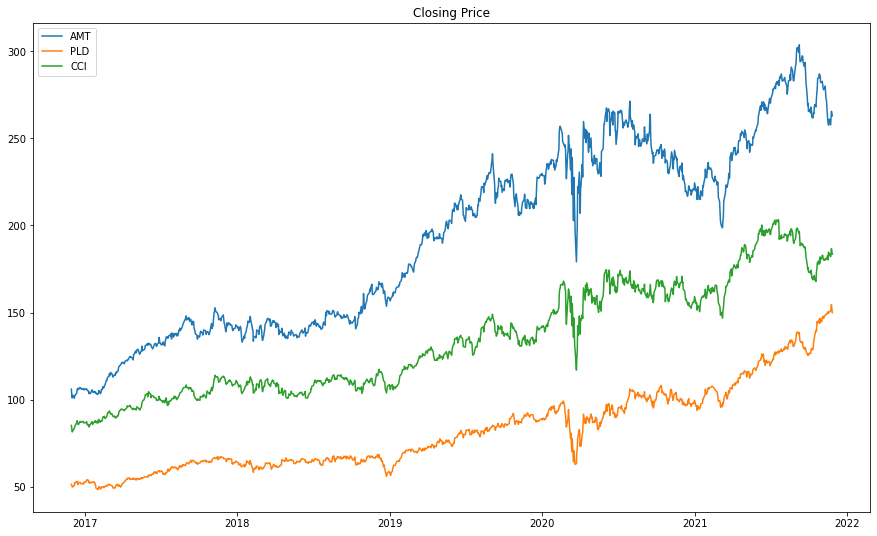

In [3]:
# Visualize the closing price
plt.figure(figsize = (15,9))
plt.title('Closing Price')
plt.plot(AmericanTower['Close'], label='AMT')
plt.plot(Prologis['Close'], label='PLD')
plt.plot(CrownCastle['Close'], label='CCI')

plt.legend()
plt.show()

In [4]:
# Create a new dataframe with only the 'Close' column
data = AmericanTower.filter(['Close'])
data1 = Prologis.filter(['Close'])
data2 = CrownCastle.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values
dataset1 = data1.values
dataset2 = data2.values

# pulls out the number of rows in the date for training the model (LSTM)
training_data_len = math.ceil(len(dataset) * .8)
training_data_len1 = math.ceil(len(dataset1) * .8)
training_data_len2 = math.ceil(len(dataset2) * .8)

In [5]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaler1 = MinMaxScaler(feature_range=(0,1))
scaler2 = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler.fit_transform(dataset)
scaled_data1 = scaler1.fit_transform(dataset1)
scaled_data2 = scaler2.fit_transform(dataset2)

scaled_data

array([[2.56448423e-02],
       [7.00299942e-03],
       [6.41144572e-04],
       ...,
       [7.94742833e-01],
       [8.11905189e-01],
       [7.99033384e-01]])

In [6]:
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, : ]
train_data1 = scaled_data1[0:training_data_len1, : ]
train_data2 = scaled_data2[0:training_data_len2, : ]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

x1_train = []
y1_train = []

x2_train = []
y2_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
for i in range(60, len(train_data1)):
    x1_train.append(train_data1[i-60:i, 0])
    y1_train.append(train_data1[i, 0])
    
for i in range(60, len(train_data2)):
    x2_train.append(train_data2[i-60:i, 0])
    y2_train.append(train_data2[i, 0])

In [7]:
# Convert x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)
x1_train, y1_train = np.array(x1_train), np.array(y1_train)
x2_train, y2_train = np.array(x2_train), np.array(y2_train)

In [8]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
x1_train = np.reshape(x1_train, (x1_train.shape[0],x1_train.shape[1], 1))
x2_train = np.reshape(x2_train, (x2_train.shape[0],x2_train.shape[1], 1))

In [9]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50,return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

model1 = Sequential()
model1.add(LSTM(50,return_sequences = True, input_shape = (x1_train.shape[1], 1)))
model1.add(LSTM(50,return_sequences = False))
model1.add(Dense(25))
model1.add(Dense(1))

model2 = Sequential()
model2.add(LSTM(50,return_sequences = True, input_shape = (x2_train.shape[1], 1)))
model2.add(LSTM(50,return_sequences = False))
model2.add(Dense(25))
model2.add(Dense(1))

In [10]:
# Compile the model
model.compile(optimizer='adam',loss = 'mean_squared_error')
model1.compile(optimizer='adam',loss = 'mean_squared_error')
model2.compile(optimizer='adam',loss = 'mean_squared_error')

In [11]:
# Train the model
model.fit(x_train,y_train,batch_size = 1, epochs = 5)
model1.fit(x1_train,y1_train,batch_size = 1, epochs = 5)
model2.fit(x2_train,y2_train,batch_size = 1, epochs = 5)

Epoch 1/5
947/947 [==============================] - 22s 21ms/step - loss: 0.0028
Epoch 2/5
947/947 [==============================] - 18s 19ms/step - loss: 0.0013
Epoch 3/5
947/947 [==============================] - 19s 20ms/step - loss: 0.0011
Epoch 4/5
947/947 [==============================] - 20s 21ms/step - loss: 7.5029e-04
Epoch 5/5
947/947 [==============================] - 22s 23ms/step - loss: 7.8791e-04
Epoch 1/5
947/947 [==============================] - 22s 21ms/step - loss: 0.0015
Epoch 2/5
947/947 [==============================] - 20s 21ms/step - loss: 6.6594e-04
Epoch 3/5
947/947 [==============================] - 19s 20ms/step - loss: 5.1043e-04
Epoch 4/5
947/947 [==============================] - 18s 20ms/step - loss: 4.9874e-04 0s - loss: 4
Epoch 5/5
947/947 [==============================] - 19s 20ms/step - loss: 3.6236e-04
Epoch 1/5
947/947 [==============================] - 21s 20ms/step - loss: 0.0025
Epoch 2/5
947/947 [==============================] - 19s 20ms

In [12]:
# Create a testing data set
test_data = scaled_data[training_data_len - 60: , :]
test_data1 = scaled_data1[training_data_len1 - 60: , :]
test_data2 = scaled_data2[training_data_len2 - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]

x1_test = []
y1_test = dataset1[training_data_len1: , :]

x2_test = []
y2_test = dataset2[training_data_len2: , :]


for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i , 0])
    
for i in range(60,len(test_data1)):
    x1_test.append(test_data1[i-60:i , 0])
    
for i in range(60,len(test_data2)):
    x2_test.append(test_data2[i-60:i , 0])

In [13]:
# again transform into a numpy array
x_test = np.array(x_test)
x1_test = np.array(x1_test)
x2_test = np.array(x2_test)

In [14]:
# reshape again
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1], 1))
x1_test = np.reshape(x1_test,(x1_test.shape[0],x1_test.shape[1], 1))
x2_test = np.reshape(x2_test,(x2_test.shape[0],x2_test.shape[1], 1))

In [15]:
# Getting the models predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

predictions1 = model1.predict(x1_test)
predictions1 = scaler1.inverse_transform(predictions1)

predictions2 = model2.predict(x2_test)
predictions2 = scaler2.inverse_transform(predictions2)

In [16]:
# Get to root mean squared error (RMSE)
rmse =np.sqrt(np.mean(predictions-y_test)**2)
rmse1 =np.sqrt(np.mean(predictions1-y1_test)**2)
rmse2 =np.sqrt(np.mean(predictions2-y2_test)**2)

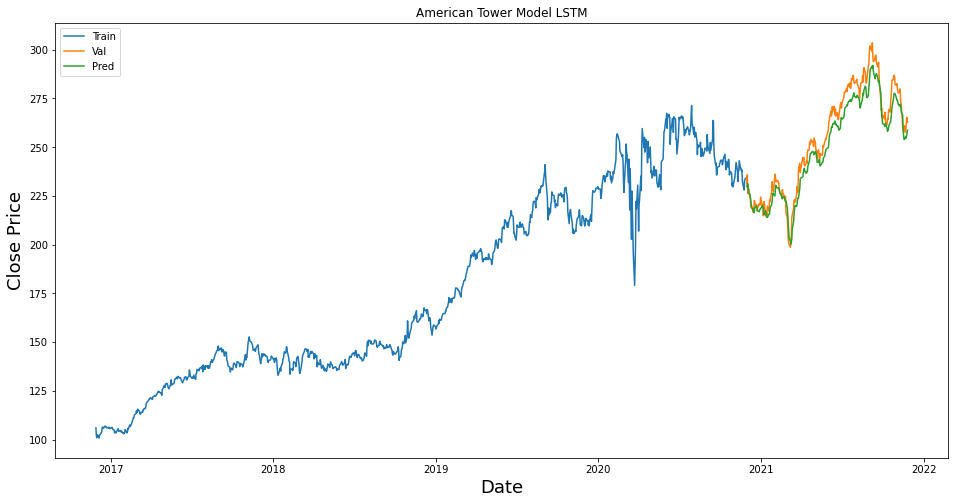

In [17]:
# Plot data
train = data[:training_data_len]
valid = data[training_data_len: ]
valid['Predictions'] = predictions

# Visualize data
plt.figure(figsize=(16,8))
plt.title('American Tower Model LSTM')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price',fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Pred'], loc = 'upper left')
plt.show()

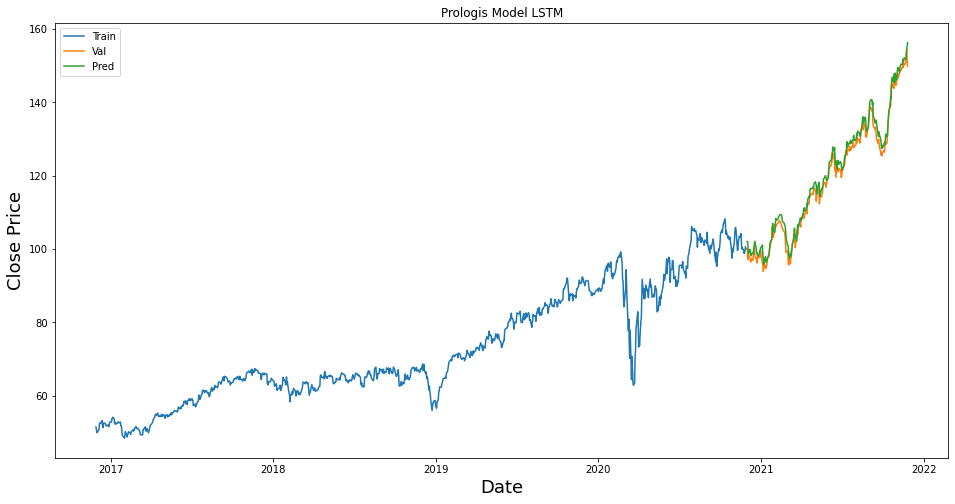

In [18]:
# build a schedule
train1 = data1[:training_data_len1]
valid1 = data1[training_data_len1: ]
valid1['Predictions'] = predictions1

# visualize
plt.figure(figsize=(16,8))
plt.title('Prologis Model LSTM')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price',fontsize = 18)
plt.plot(train1['Close'])
plt.plot(valid1[['Close','Predictions']])
plt.legend(['Train','Val','Pred'], loc = 'upper left')
plt.show()

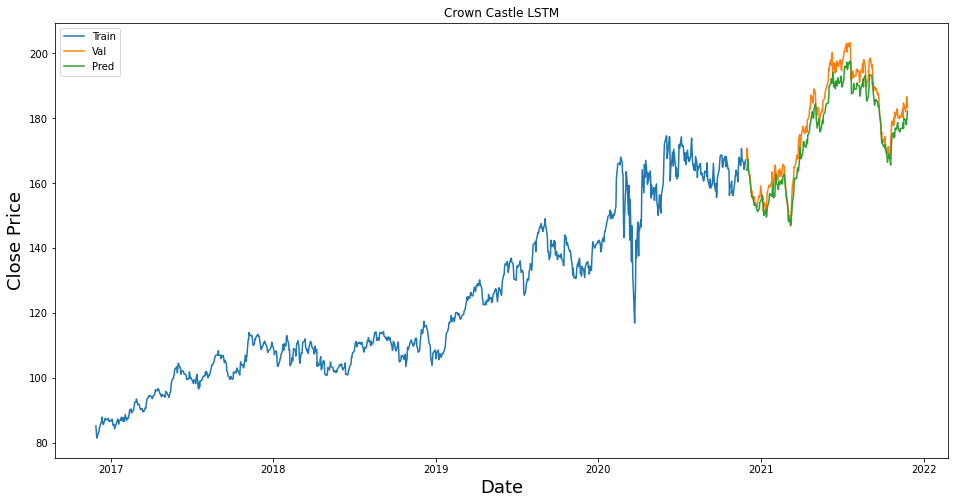

In [19]:
# build a schedule
train2 = data2[:training_data_len2]
valid2 = data2[training_data_len2: ]
valid2['Predictions'] = predictions2

# visualize
plt.figure(figsize=(16,8))
plt.title('Crown Castle LSTM')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price',fontsize = 18)
plt.plot(train2['Close'])
plt.plot(valid2[['Close','Predictions']])
plt.legend(['Train','Val','Pred'], loc = 'upper left')
plt.show()

#### From the graphs, we can see that Prologis is continually going up without any noticeable dips and fits well relative to the actual price. Due to this reason, I will invest in Prologis and ignore the other stocks.
